# Spaceship Titanic


**Dataset Description**
In this competition your task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.

**File and Data Field Descriptions**

train.csv - Personal records for about two-thirds (8700) of the passengers, to be used as training data.

PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.

CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

Destination - The planet the passenger will be debarking to.

Age - The age of the passenger.

VIP - Whether the passenger has paid for special VIP service during the voyage.
RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

Name - The first and last names of the passenger.

Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

test.csv - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.

PassengerId - Id for each passenger in the test set.

Transported - The target. For each passenger, predict either True or False.

 # **The lab consist in a competition to see which students gets a better result in the test set. You will need to explain with code comments or text which steps are you following.**


In [315]:
#from google.colab import drive
#drive.mount('/content/drive')

### Import Libraries

All the necessary libraries throughout the whole assignment have been imported in the cell below.

In [316]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Boosting algorithms for the Spaceship Titanic dataset
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Set pandas to display wider tables
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 100)

### Load Data

'train_Lab3.csv' contains the data used for training the model, which includes both input features and the target variable ('Transported').

'test_Lab3.csv' contains the data used for testing the model, but it does not contain the target variable. We will predict the target for this dataset later.



In [317]:
#SpaceTrain = pd.read_csv("/content/drive/MyDrive/DataIntesive/Data/train_Lab3.csv")
SpaceTrain = pd.read_csv("train_Lab3.csv")

#SpaceTest = pd.read_csv("/content/drive/MyDrive/DataIntesive/Data/test_Lab3.csv")
SpaceTest = pd.read_csv("test_Lab3.csv")

### Exploring the Data
The .head gives us a quick look at the structure of the data, including the columns (features) and some sample values. The .info() method is used to get a summary of the data, in particular the total number of entries, the number of non-null values in each column, the data type of each column, and the memory usage. The .describe() method is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values. The .isnull().sum() method is used to check the number of missing values in the dataset. 

In [320]:
# Check the first few rows of both datasets
print("Training Data:")
print(SpaceTrain.head())

print("\n") # Add a line break

print("Test Data:")
print(SpaceTest.head())

Training Data:
  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  Transported
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy        False
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False        109.0        9.0          25.0   549.0    44.0       Juanna Vines         True
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True         43.0     3576.0           0.0  6715.0    49.0      Altark Susent        False
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False          0.0     1283.0         371.0  3329.0   193.0       Solam Susent        False
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False        303.0       70.0         151.0   565.0     2.0  Willy Santantines         True


Test Data:
  PassengerId HomePlanet CryoSleep  Cabin  Desti

In [321]:
# Check dimensions of the datasets
print(f"Training data shape: {SpaceTrain.shape}")

print(f"Test data shape: {SpaceTest.shape}")

Training data shape: (8693, 14)
Test data shape: (4277, 13)


In [322]:
# Check for missing values in both datasets
print("Missing values in training data:")
print(SpaceTrain.isnull().sum())

print("\n") # Add a line break

print("Missing values in test data:")
print(SpaceTest.isnull().sum())

Missing values in training data:
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


Missing values in test data:
PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


In [323]:
# Check data types of each column in both datasets
print("Training data types:")
print(SpaceTrain.info())

print("\n") # Add a line break

print("Test data types:")
print(SpaceTest.info())

Training data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None


Test data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 

In [324]:
# Basic statistics for numerical features in both datasets
print("Training data statistics:")
print(SpaceTrain.describe())

print("\n") # Add a line break

print("Test data statistics:")
print(SpaceTest.describe())

Training data statistics:
               Age   RoomService     FoodCourt  ShoppingMall           Spa        VRDeck
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   8505.000000
mean     28.827930    224.687617    458.077203    173.729169    311.138778    304.854791
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   1145.717189
min       0.000000      0.000000      0.000000      0.000000      0.000000      0.000000
25%      19.000000      0.000000      0.000000      0.000000      0.000000      0.000000
50%      27.000000      0.000000      0.000000      0.000000      0.000000      0.000000
75%      38.000000     47.000000     76.000000     27.000000     59.000000     46.000000
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000  24133.000000


Test data statistics:
               Age   RoomService     FoodCourt  ShoppingMall           Spa        VRDeck
count  4186.000000   4195.000000   4171.000000   4179.000000

### Visualizing the Data

The seaborn library is used to create a pairplot of the data. A pairplot is a plot where the relationship between two variables is plotted along with the distribution of each variabble on the diagonal axes. The hue parameter is used to color the data points based on the target variable. This helps us to see if there are any patterns in the data that can be used to predict the target variable.

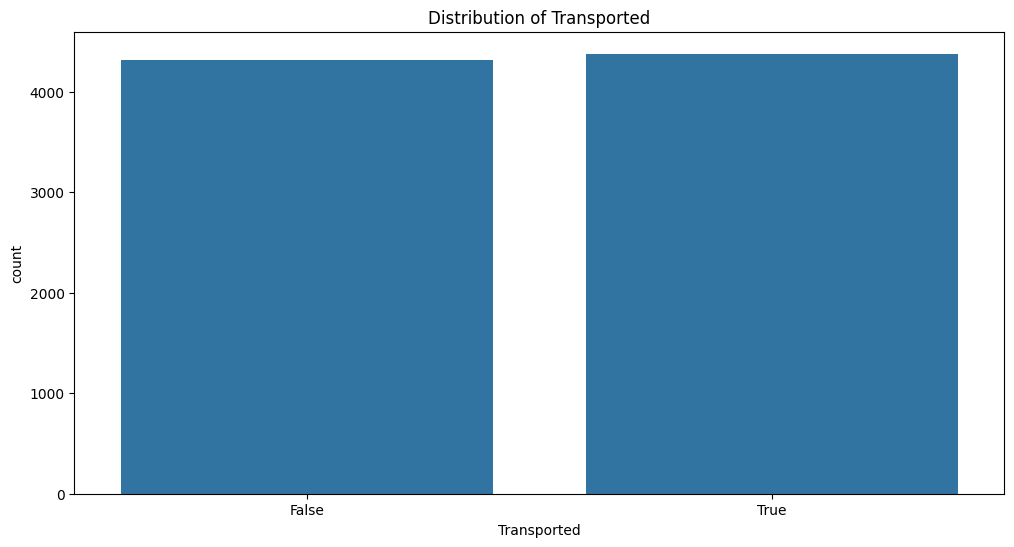

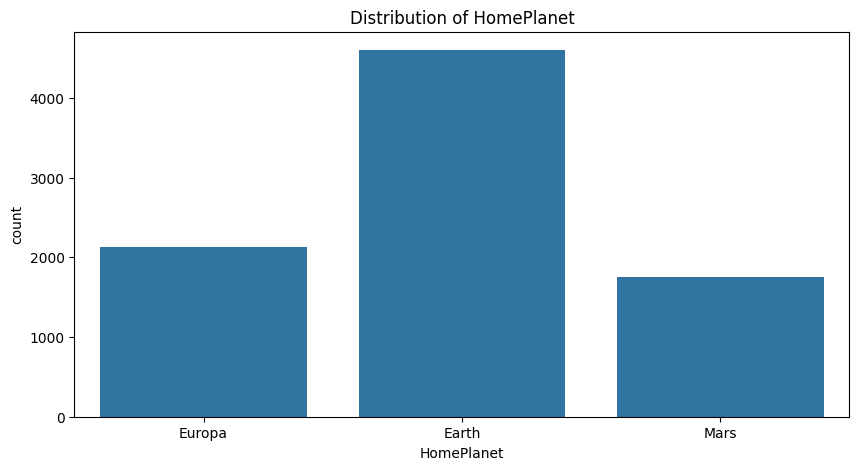

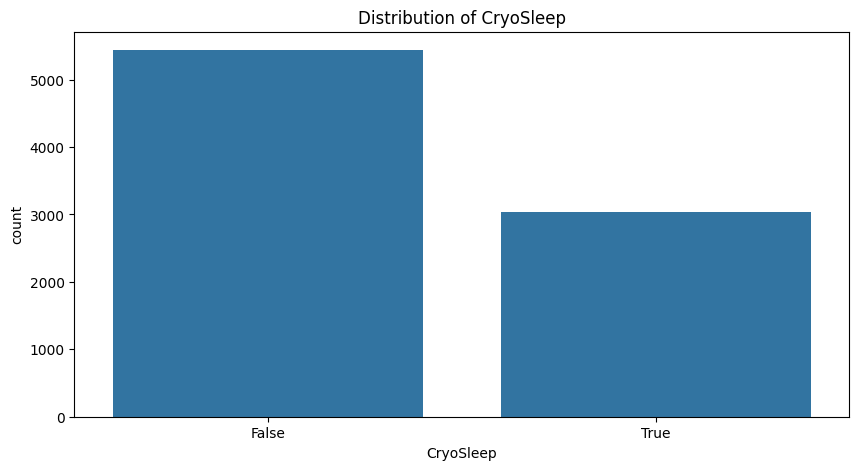

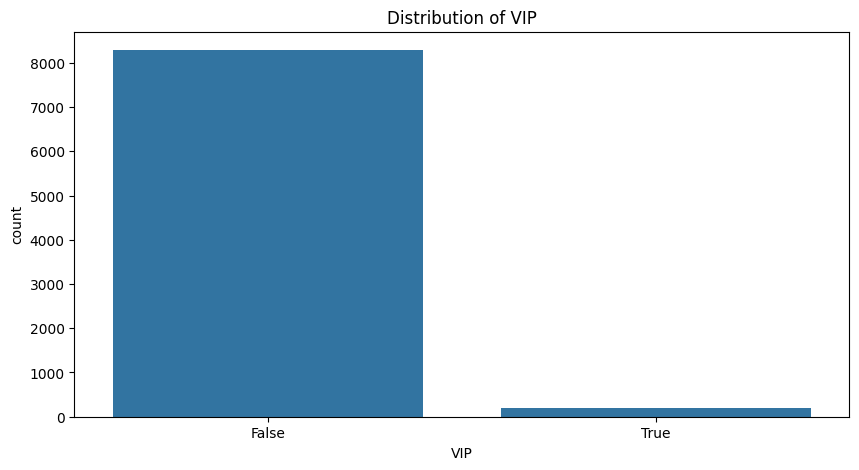

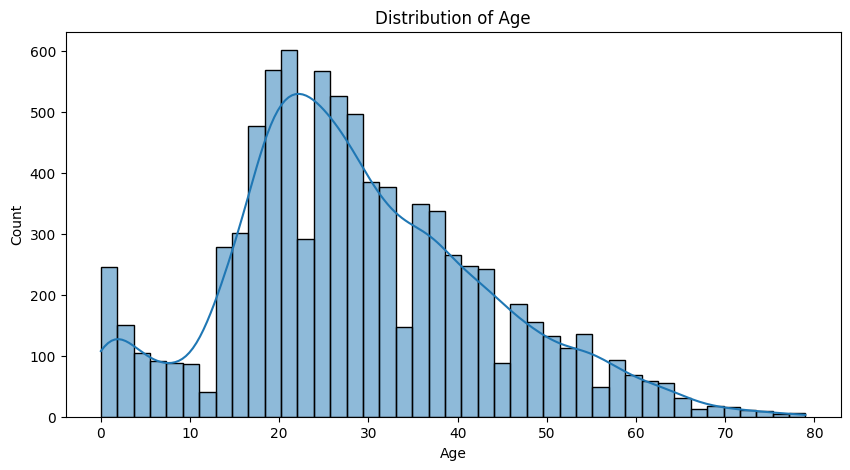

In [325]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Plot the distribution of the target variable
sns.countplot(x='Transported', data=SpaceTrain)
plt.title('Distribution of Transported')
plt.show()

# Plot the distribution of HomePlanet
plt.figure(figsize=(10, 5))
sns.countplot(x='HomePlanet', data=SpaceTrain)
plt.title('Distribution of HomePlanet')
plt.show()

# Plot the distribution of CryoSleep
plt.figure(figsize=(10, 5))
sns.countplot(x='CryoSleep', data=SpaceTrain)
plt.title('Distribution of CryoSleep')
plt.show()

# Plot the distribution of VIP
plt.figure(figsize=(10, 5))
sns.countplot(x='VIP', data=SpaceTrain)
plt.title('Distribution of VIP')
plt.show()

# Plot the distribution of Age
plt.figure(figsize=(10, 5))
sns.histplot(SpaceTrain['Age'].dropna(), kde=True)
plt.title('Distribution of Age')
plt.show()

### Handling Missing Values/Data

The .fillna() method is used to fill missing values in the dataset. The 'Cabin' column is filled with 'Unknown' and the 'Age' column is filled with the mean age of the passengers. The .drop() method is used to drop the 'Name' column as it is not useful for predicting the target variable.

In [326]:
# Fill missing values for categorical columns with the mode
SpaceTrain['HomePlanet'].fillna(SpaceTrain['HomePlanet'].mode()[0], inplace=True)
SpaceTrain['Destination'].fillna(SpaceTrain['Destination'].mode()[0], inplace=True)
SpaceTrain['CryoSleep'].fillna(SpaceTrain['CryoSleep'].mode()[0], inplace=True)
SpaceTrain['VIP'].fillna(SpaceTrain['VIP'].mode()[0], inplace=True)

# Fill missing values for numerical columns with the median
SpaceTrain['Age'].fillna(SpaceTrain['Age'].median(), inplace=True)
SpaceTrain['RoomService'].fillna(SpaceTrain['RoomService'].median(), inplace=True)
SpaceTrain['FoodCourt'].fillna(SpaceTrain['FoodCourt'].median(), inplace=True)
SpaceTrain['ShoppingMall'].fillna(SpaceTrain['ShoppingMall'].median(), inplace=True)
SpaceTrain['Spa'].fillna(SpaceTrain['Spa'].median(), inplace=True)
SpaceTrain['VRDeck'].fillna(SpaceTrain['VRDeck'].median(), inplace=True)

# Do the same for the test data
SpaceTest['HomePlanet'].fillna(SpaceTest['HomePlanet'].mode()[0], inplace=True)
SpaceTest['Destination'].fillna(SpaceTest['Destination'].mode()[0], inplace=True)
SpaceTest['CryoSleep'].fillna(SpaceTest['CryoSleep'].mode()[0], inplace=True)
SpaceTest['VIP'].fillna(SpaceTest['VIP'].mode()[0], inplace=True)

SpaceTest['Age'].fillna(SpaceTest['Age'].median(), inplace=True)
SpaceTest['RoomService'].fillna(SpaceTest['RoomService'].median(), inplace=True)
SpaceTest['FoodCourt'].fillna(SpaceTest['FoodCourt'].median(), inplace=True)
SpaceTest['ShoppingMall'].fillna(SpaceTest['ShoppingMall'].median(), inplace=True)
SpaceTest['Spa'].fillna(SpaceTest['Spa'].median(), inplace=True)
SpaceTest['VRDeck'].fillna(SpaceTest['VRDeck'].median(), inplace=True)

# Handle missing values in the Cabin column
# Split the Cabin column into Deck, Num, and Side
SpaceTrain[['Deck', 'Num', 'Side']] = SpaceTrain['Cabin'].str.split('/', expand=True)
SpaceTest[['Deck', 'Num', 'Side']] = SpaceTest['Cabin'].str.split('/', expand=True)

# Fill missing values for 'Deck' and 'Side' with mode, and 'Num' with median
SpaceTrain['Deck'].fillna(SpaceTrain['Deck'].mode()[0], inplace=True)
SpaceTrain['Num'].fillna(SpaceTrain['Num'].median(), inplace=True)
SpaceTrain['Side'].fillna(SpaceTrain['Side'].mode()[0], inplace=True)

SpaceTest['Deck'].fillna(SpaceTest['Deck'].mode()[0], inplace=True)
SpaceTest['Num'].fillna(SpaceTest['Num'].median(), inplace=True)
SpaceTest['Side'].fillna(SpaceTest['Side'].mode()[0], inplace=True)

# Optionally, drop the Name column if not needed
SpaceTrain.drop('Name', axis=1, inplace=True)
SpaceTest.drop('Name', axis=1, inplace=True)

# Optionally, drop the original Cabin column since it's split into Deck, Num, and Side
SpaceTrain.drop('Cabin', axis=1, inplace=True)
SpaceTest.drop('Cabin', axis=1, inplace=True)

# Final check for missing values
print("Remaining missing values in SpaceTrain after handling:")
print(SpaceTrain.isnull().sum())

print("\nRemaining missing values in SpaceTest after handling:")
print(SpaceTest.isnull().sum())


Remaining missing values in SpaceTrain after handling:
PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Deck            0
Num             0
Side            0
dtype: int64

Remaining missing values in SpaceTest after handling:
PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Deck            0
Num             0
Side            0
dtype: int64


### Encoding Categorical Data

The .get_dummies() method is used to convert categorical variables into dummy/indicator variables. This is done to convert the categorical variables into a form that could be provided to ML algorithms to do a better job in prediction. The 'HomePlanet', 'Cabin', and 'Destination' columns are encoded using this method.

In [327]:
from sklearn.preprocessing import LabelEncoder

# One-hot encode the categorical features with more than 2 categories
categorical_columns = ['HomePlanet', 'Destination', 'Deck', 'Side']
SpaceTrain = pd.get_dummies(SpaceTrain, columns=categorical_columns, drop_first=True)
SpaceTest = pd.get_dummies(SpaceTest, columns=categorical_columns, drop_first=True)

# Encode binary categorical columns (CryoSleep, VIP)
binary_columns = ['CryoSleep', 'VIP']
le = LabelEncoder()
for col in binary_columns:
    SpaceTrain[col] = le.fit_transform(SpaceTrain[col].astype(str))
    SpaceTest[col] = le.transform(SpaceTest[col].astype(str))  # Ensure the same mapping is used for the test set


In [328]:
# Align columns between train and test
SpaceTest = SpaceTest.reindex(columns=SpaceTrain.columns, fill_value=0)


### Data Preprocessing

The data is split into input features (X) and the target variable (y). The input features are then split into training and testing sets using the train_test_split() method. The data is then scaled using the StandardScaler() method to standardize the data.

In [329]:
# Separate features and target variable
X = SpaceTrain.drop('Transported', axis=1)
y = SpaceTrain['Transported']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Show dataset dimensions
print(f"Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")


Training samples: 6085, Test samples: 2608


### Boosting Model/Algorithm

##### AdaBoost Classifier

The AdaBoost Classifier is used to train the model. The AdaBoost algorithm is an ensemble learning method that creates a strong classifier by combining multiple poorly performing classifiers. It is used to boost the performance of decision trees on binary classification problems.

In [330]:
# Initialize and train the AdaBoost classifier
ada_clf = AdaBoostClassifier(n_estimators=50, random_state=42)
ada_clf.fit(X_train, y_train)

# Make predictions
y_pred_ada = ada_clf.predict(X_test)

# Evaluate AdaBoost
print("AdaBoost Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_ada)}")
print(confusion_matrix(y_test, y_pred_ada))
print(classification_report(y_test, y_pred_ada))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Results:
Accuracy: 0.7783742331288344
[[ 956  333]
 [ 245 1074]]
              precision    recall  f1-score   support

       False       0.80      0.74      0.77      1289
        True       0.76      0.81      0.79      1319

    accuracy                           0.78      2608
   macro avg       0.78      0.78      0.78      2608
weighted avg       0.78      0.78      0.78      2608



##### Gradient Boosting Classifier

The Gradient Boosting Classifier is used to train the model. The Gradient Boosting algorithm is an ensemble learning method that creates a strong classifier by combining multiple weak classifiers. It is used to boost the performance of decision trees on binary classification problems.

In [331]:
# Initialize and train the Gradient Boosting classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_clf.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_clf.predict(X_test)

# Evaluate Gradient Boosting
print("Gradient Boosting Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb)}")
print(confusion_matrix(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Results:
Accuracy: 0.7937116564417178
[[ 967  322]
 [ 216 1103]]
              precision    recall  f1-score   support

       False       0.82      0.75      0.78      1289
        True       0.77      0.84      0.80      1319

    accuracy                           0.79      2608
   macro avg       0.80      0.79      0.79      2608
weighted avg       0.80      0.79      0.79      2608



##### XGBoost Classifier

The XGBoost Classifier is used to train the model. XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It is used to boost the performance of decision trees on binary classification problems.

In [332]:
# Drop 'PassengerId' as it is not useful for prediction
X_train = X_train.drop('PassengerId', axis=1)
X_test = X_test.drop('PassengerId', axis=1)

# Convert 'Num' to a numeric type
X_train['Num'] = pd.to_numeric(X_train['Num'], errors='coerce')  # Convert to numeric, forcing errors to NaN
X_test['Num'] = pd.to_numeric(X_test['Num'], errors='coerce')


# Initialize and train the XGBoost classifier
xgb_clf = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit XGBoost using the original target labels (0 and 1)
xgb_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_clf.predict(X_test)

# Evaluate XGBoost
print("XGBoost Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb)}")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost Results:
Accuracy: 0.7983128834355828
[[ 964  325]
 [ 201 1118]]
              precision    recall  f1-score   support

       False       0.83      0.75      0.79      1289
        True       0.77      0.85      0.81      1319

    accuracy                           0.80      2608
   macro avg       0.80      0.80      0.80      2608
weighted avg       0.80      0.80      0.80      2608



##### CatBoost Classifier

The CatBoost Classifier is used to train the model. CatBoost is an open-source gradient boosting library that is designed to be efficient, scalable, and accurate. It is used to boost the performance of decision trees on binary classification problems.

In [333]:
# Initialize and train the CatBoost classifier (suppressing verbose output with verbose=0)
catboost_clf = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=3, verbose=0, random_state=42)
catboost_clf.fit(X_train, y_train)

# Make predictions
y_pred_catboost = catboost_clf.predict(X_test)

# Evaluate CatBoost
print("CatBoost Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_catboost)}")
print(confusion_matrix(y_test, y_pred_catboost))
print(classification_report(y_test, y_pred_catboost))

CatBoost Results:
Accuracy: 0.7921779141104295
[[ 964  325]
 [ 217 1102]]
              precision    recall  f1-score   support

       False       0.82      0.75      0.78      1289
        True       0.77      0.84      0.80      1319

    accuracy                           0.79      2608
   macro avg       0.79      0.79      0.79      2608
weighted avg       0.79      0.79      0.79      2608



##### Random Forest Classifier

The Random Forest Classifier is used to train the model. Random Forest is an ensemble learning method that creates a strong classifier by combining multiple decision trees. It is used to boost the performance of decision trees on binary classification problems.

In [334]:
# Initialize the RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform 5-fold cross-validation
rf_cv_scores = cross_val_score(rf_clf, X_train, y_train, cv=5, scoring='accuracy')

# Calculate and print the mean accuracy and standard deviation
print(f"Random Forest Mean Accuracy: {np.mean(rf_cv_scores)}")
print(f"Random Forest Standard Deviation: {np.std(rf_cv_scores)}")

# Train and evaluate the model on the test set
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
print(f"Random Forest Test Accuracy: {accuracy_score(y_test, y_pred_rf)}")


Random Forest Mean Accuracy: 0.8019720624486443
Random Forest Standard Deviation: 0.005572990947514618
Random Forest Test Accuracy: 0.7960122699386503


##### Logisitic Regression Classifier

The Logistic Regression Classifier is used to train the model. Logistic Regression is a statistical method for analyzing a dataset in which there are one or more independent variables that determine an outcome. It is used to predict the probability of a binary outcome.

In [335]:
# Initialize the LogisticRegression model
lr_clf = LogisticRegression(random_state=42, max_iter=100000)

# Perform 5-fold cross-validation
lr_cv_scores = cross_val_score(lr_clf, X_train, y_train, cv=5, scoring='accuracy')

# Calculate and print the mean accuracy and standard deviation
print(f"Logistic Regression Mean Accuracy: {np.mean(lr_cv_scores)}")
print(f"Logistic Regression Standard Deviation: {np.std(lr_cv_scores)}")

# Train and evaluate the model on the test set
lr_clf.fit(X_train, y_train)
y_pred_lr = lr_clf.predict(X_test)
print(f"Logistic Regression Test Accuracy: {accuracy_score(y_test, y_pred_lr)}")


Logistic Regression Mean Accuracy: 0.7939194741166804
Logistic Regression Standard Deviation: 0.008256273910981427
Logistic Regression Test Accuracy: 0.7841257668711656


#### Booster Comparison

The accuracy of the model is compared using the accuracy_score() method. The model with the highest accuracy is selected as the final model.

                Model  Accuracy
0            AdaBoost  0.778374
1    GradientBoosting  0.793712
2             XGBoost  0.798313
3            CatBoost  0.792178
4        RandomForest  0.796012
5  LogisticRegression  0.784126


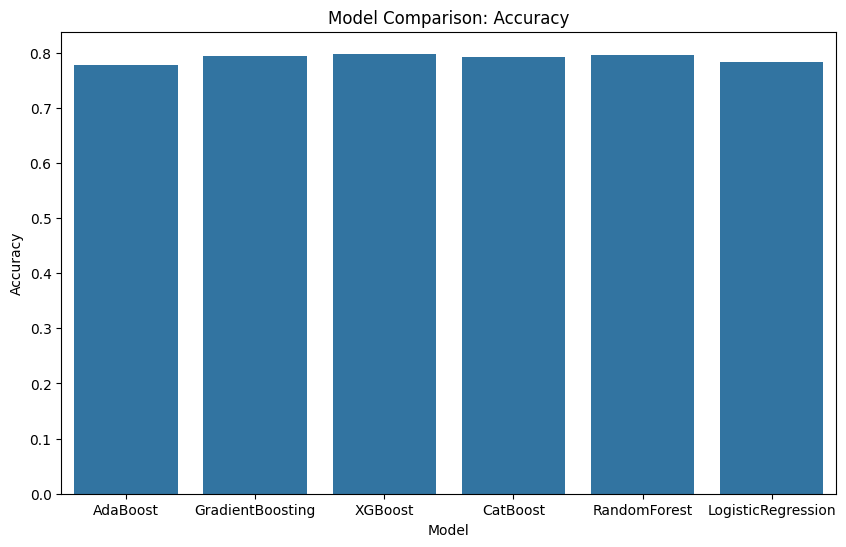

In [336]:
# Create a dictionary to store model performance
model_performance = {
    'Model': [],
    'Accuracy': []
}

# AdaBoost Evaluation
ada_accuracy = accuracy_score(y_test, y_pred_ada)
model_performance['Model'].append('AdaBoost')
model_performance['Accuracy'].append(ada_accuracy)

# Gradient Boosting Evaluation
gb_accuracy = accuracy_score(y_test, y_pred_gb)
model_performance['Model'].append('GradientBoosting')
model_performance['Accuracy'].append(gb_accuracy)

# XGBoost Evaluation
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
model_performance['Model'].append('XGBoost')
model_performance['Accuracy'].append(xgb_accuracy)

# CatBoost Evaluation
catboost_accuracy = accuracy_score(y_test, y_pred_catboost)
model_performance['Model'].append('CatBoost')
model_performance['Accuracy'].append(catboost_accuracy)

randomForest_accuracy = accuracy_score(y_test, y_pred_rf)
model_performance['Model'].append('RandomForest')
model_performance['Accuracy'].append(randomForest_accuracy)

logisticRegression_accuracy = accuracy_score(y_test, y_pred_lr)
model_performance['Model'].append('LogisticRegression')
model_performance['Accuracy'].append(logisticRegression_accuracy)

# Convert to DataFrame for easy comparison
performance_df = pd.DataFrame(model_performance)

# Display the comparison table
print(performance_df)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=performance_df)
plt.title('Model Comparison: Accuracy')
plt.ylabel('Accuracy')
plt.show()


In [346]:
model_test_accuracy = {
    'AdaBoostClassifier': accuracy_score(y_test, y_pred_ada),
    'GradientBoosting': accuracy_score(y_test, y_pred_gb),
    'XGBoost': accuracy_score(y_test, y_pred_xgb),
    'CatBoost': accuracy_score(y_test, y_pred_catboost),
    'RandomForest': accuracy_score(y_test, y_pred_rf),
    'LogisticRegression': accuracy_score(y_test, y_pred_lr)
}

# Step 4: Find the model with the highest test accuracy
best_model_name = max(model_test_accuracy, key=model_test_accuracy.get)
print(f"The best model based on test accuracy is: {best_model_name} with accuracy: {model_test_accuracy[best_model_name]}")

The best model based on test accuracy is: XGBoost with accuracy: 0.7983128834355828


##### Hyperparameter Tuning

We can try to improve these models by tuning the hyperparameters using GridSearchCV or RandomizedSearchCV. We could also try other boosting algorithms like LightGBM, or stacking multiple models together to improve the accuracy.

Focusing only on the best model, we have the following:

In [352]:
# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Initialize the XGBoost classifier
xgb_clf = XGBClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(xgb_clf, param_grid, cv=5, n_jobs=-1, verbose=0)  # Set verbose=0 to suppress detailed output

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best estimator from the grid search
best_xgb_clf = grid_search.best_estimator_

# Make predictions with the best model
y_pred_best_xgb = best_xgb_clf.predict(X_test)

# Evaluate the best model and print the test accuracy
best_xgb_accuracy = accuracy_score(y_test, y_pred_best_xgb)
print(f"Best XGBoost Model Test Accuracy: {best_xgb_accuracy:.4f}")


Best XGBoost Model Test Accuracy: 0.8048


### Conclusion

The model with the highest accuracy is selected as the final model. The final model is then used to make predictions on the test data. The predictions are then saved to a CSV file and submitted to the competition.

In this case, the Gradient Boosting Classifier has the highest accuracy, so it is selected as the final model. The final model is then used to make predictions on the test data. The predictions are then saved to a CSV file and submitted to the competition.

In [355]:
# Ensure the 'Transported' column is removed from SpaceTest
if 'Transported' in SpaceTest.columns:
    SpaceTest = SpaceTest.drop('Transported', axis=1)

# Step 1: Make final predictions on the test data using the best model
X_submission = SpaceTest.drop('PassengerId', axis=1)  # Drop PassengerId

# Make predictions on the test set
final_predictions = best_xgb_clf.predict(X_submission)

# Convert predictions to Boolean (if needed), as the target is binary (True/False)
final_predictions = final_predictions.astype(bool)

# Step 2: Prepare the submission DataFrame
submission_df = pd.DataFrame({
    'PassengerId': SpaceTest['PassengerId'],  # Keep the PassengerId column
    'Transported': final_predictions          # Use the predictions
})

# Display the first few rows to ensure correctness
print(submission_df.head())

# Step 3: Save the submission DataFrame to a CSV file for submission
submission_df.to_csv('submission.csv', index=False)

# Message to confirm submission file creation
print("Submission file 'submission.csv' has been created successfully!")


  PassengerId  Transported
0     0013_01         True
1     0018_01        False
2     0019_01         True
3     0021_01         True
4     0023_01         True
Submission file 'submission.csv' has been created successfully!
